### Sales Analysis

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Task #1 : Merging 12 months of data into a single csv file

In [69]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
sales_files=[file for file in os.listdir('.\Sales_Data')]
sales_data = pd.DataFrame()
for file in sales_files:
    df=pd.read_csv('./Sales_Data/'+file)
    sales_data = pd.concat([sales_data,df])

sales_data.to_csv('all_sales_data.csv',index=False)

#### Augment data with additional column/data

In [70]:
all_data = pd.read_csv('all_sales_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [71]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')

In [72]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [73]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

In [74]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [75]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### What was the best month for sales? How much was earned that month

In [76]:
best_month_sales = all_data.groupby('Month')['Sales'].sum().reset_index()
best_month_sales

,Month,Sales
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


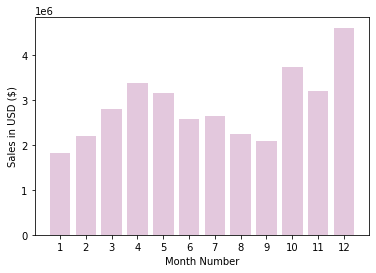

In [77]:
import matplotlib.pyplot as plt

plt.bar (best_month_sales['Month'],best_month_sales['Sales'], color='#e3c8dd')
plt.xticks(best_month_sales['Month'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

#### Which City has the highest number of Sales

In [78]:
#lets use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})")

In [80]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [81]:
best_city_sales = all_data.groupby('City')['Sales'].sum().reset_index()
best_city_sales

,City,Sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
6,Portland (ME),4.497583e+05
7,Portland (OR),1.870732e+06
8,San Francisco (CA),8.262204e+06
9,Seattle (WA),2.747755e+06


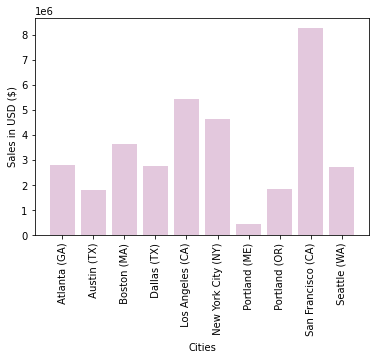

In [86]:
import matplotlib.pyplot as plt

plt.bar (best_city_sales['City'],best_city_sales['Sales'], color='#e3c8dd')
plt.xticks(best_city_sales['City'],rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

#### What time should we display advertisements to maximise sales?

In [87]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [89]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [93]:
best_hour_sales = all_data.groupby('Hour')['Quantity Ordered'].count().reset_index()
best_hour_sales

,Hour,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


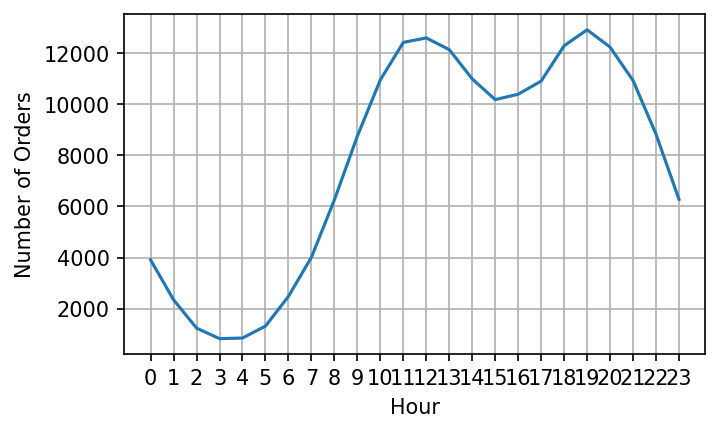

In [94]:
plt.figure(figsize=(5,3),dpi=150)
plt.plot(best_hour_sales['Hour'],best_hour_sales['Quantity Ordered'])
plt.xticks(best_hour_sales['Hour'])
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### What products are most often sold together?

In [103]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] # To see duplicate data based on Order ID
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df = df[['Order ID','grouped']].drop_duplicates()
df.head()

<ipython-input-103-91908e0341e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [106]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

In [107]:
most_product_ordered = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
most_product_ordered

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


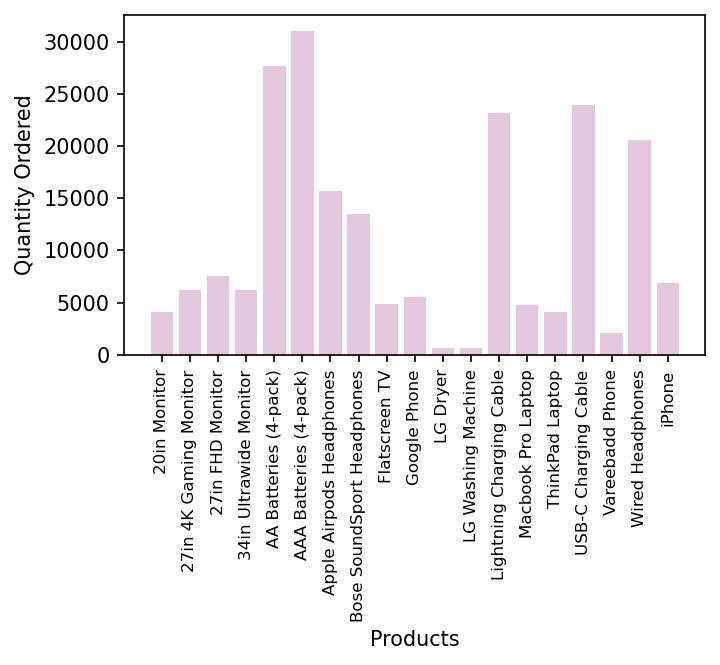

In [109]:
plt.figure(figsize=(5,3),dpi=150)
plt.bar(most_product_ordered['Product'],most_product_ordered['Quantity Ordered'], color='#e3c8dd')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(most_product_ordered['Product'],rotation='vertical',size=8)
plt.show()

In [111]:
prices_mean = all_data.groupby('Product')['Price Each'].mean().reset_index()
prices_mean

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


<ipython-input-116-e285107085b2>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(most_product_ordered['Product'],rotation='vertical',size=8)


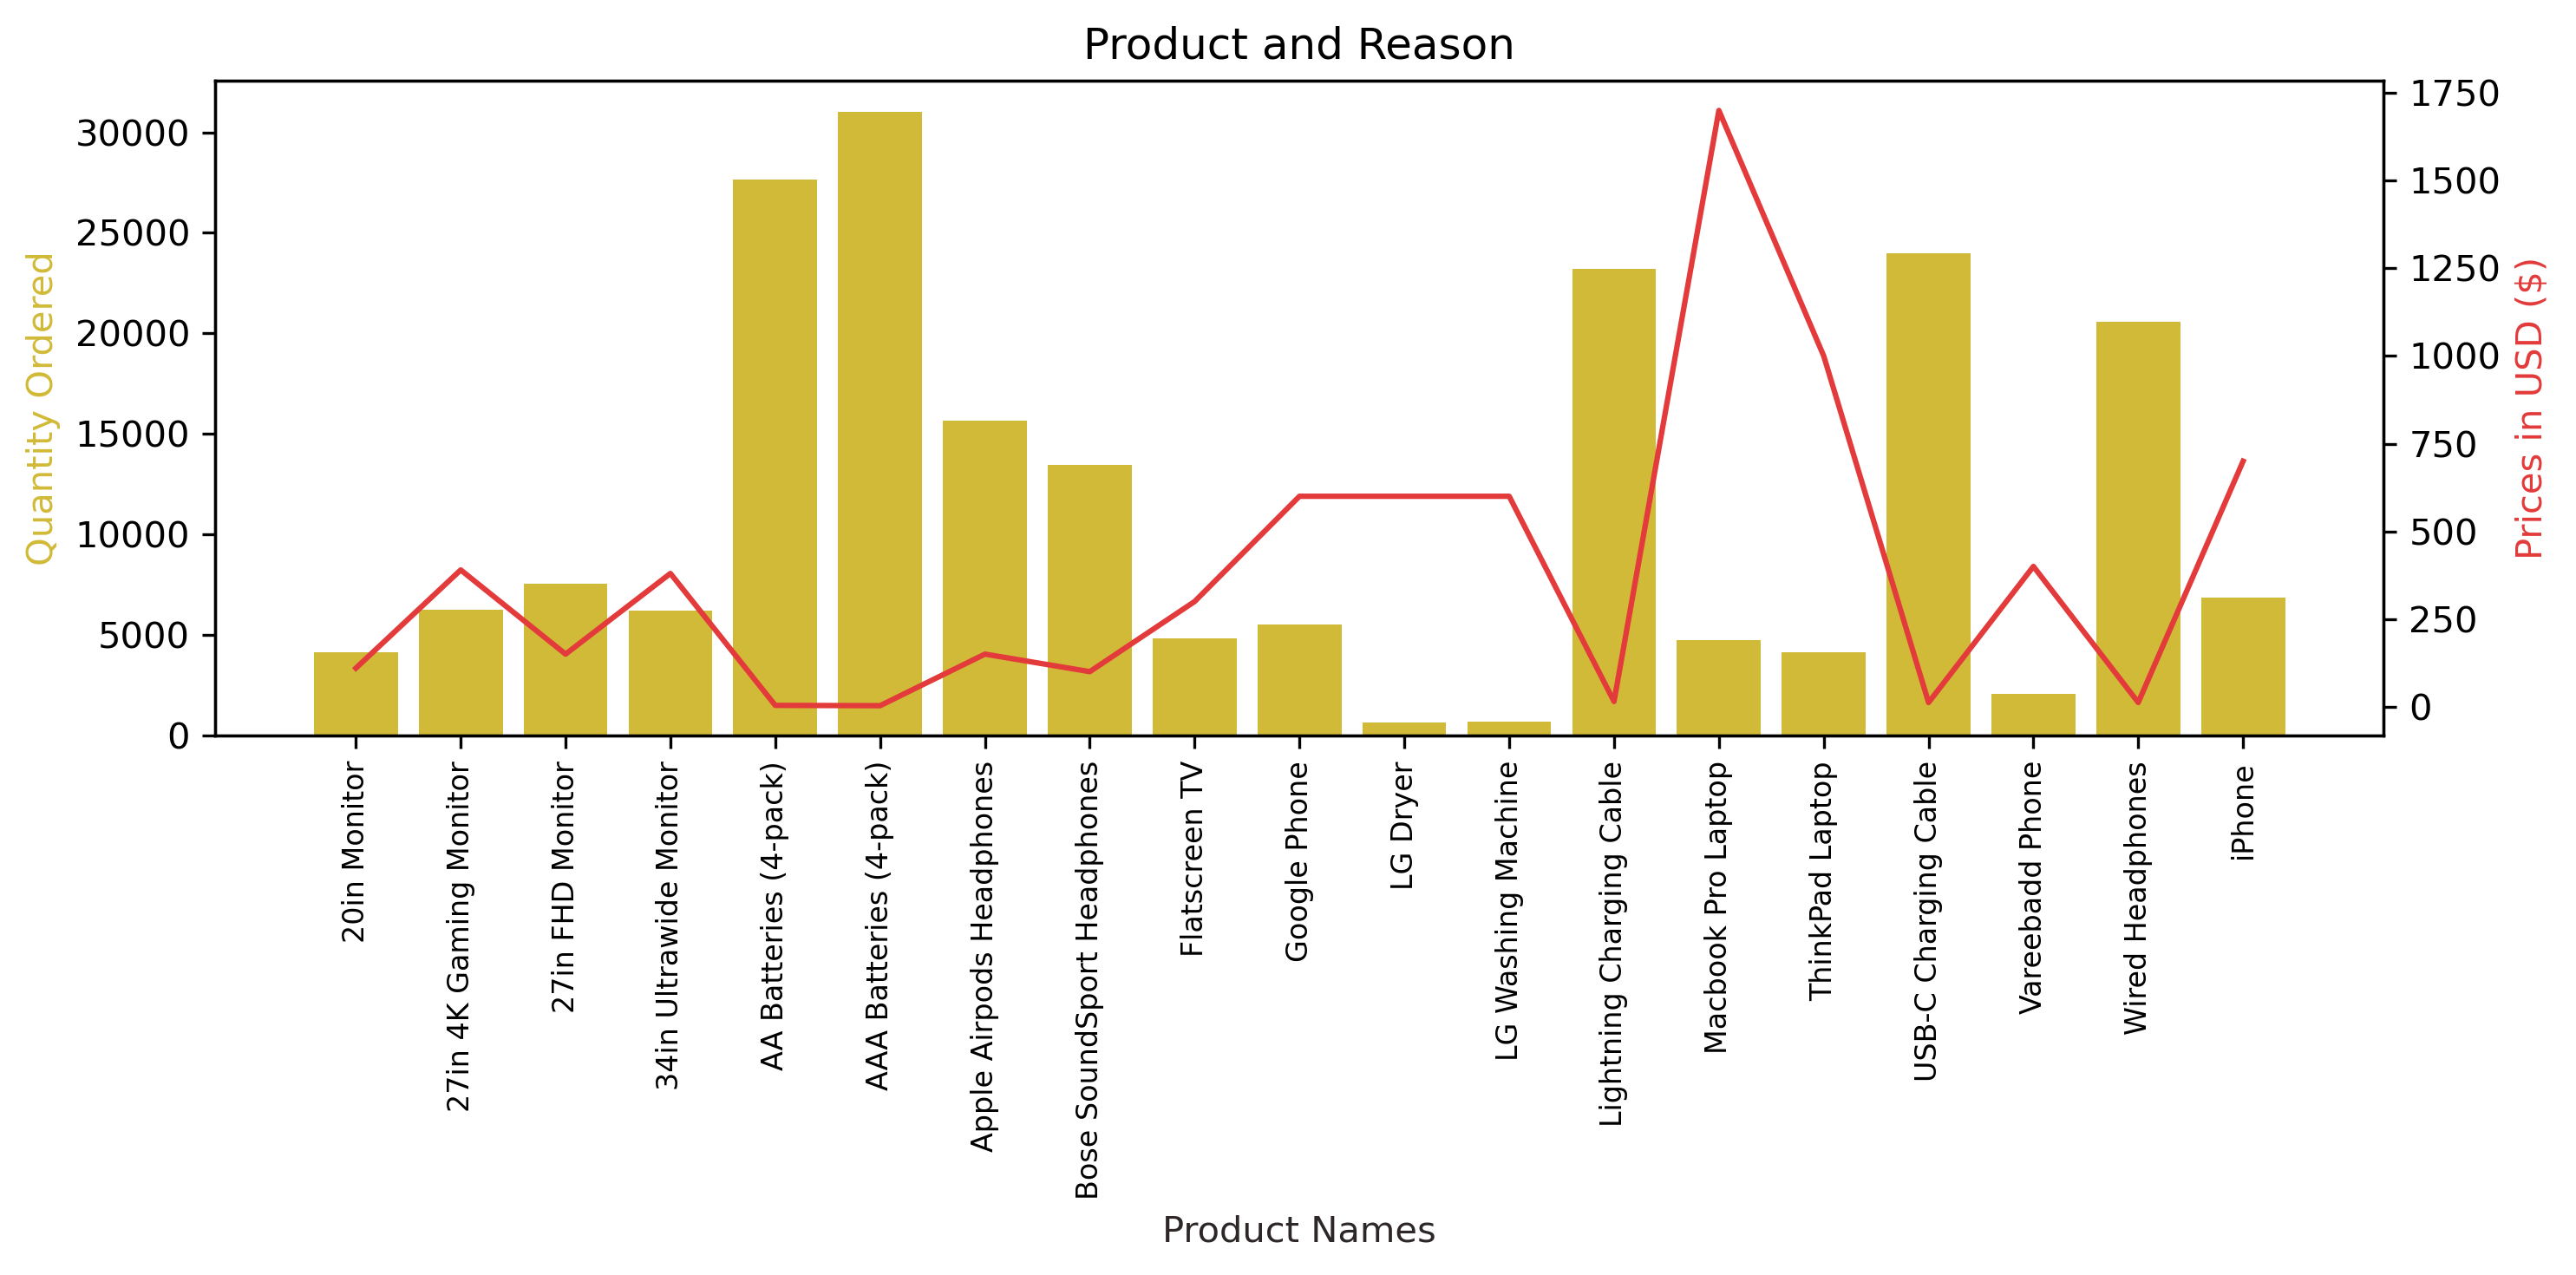

In [116]:

fig, ax = plt.subplots(figsize = (10, 5),dpi=300)
plt.title('Product and Reason')
  
# using the twinx() for creating another
# axes object for secondry y-Axis
ax2 = ax.twinx()
ax.bar(most_product_ordered['Product'],most_product_ordered['Quantity Ordered'], color='#d1ba38')
ax2.plot(most_product_ordered['Product'], prices_mean['Price Each'], color = '#e33b3b')


# giving labels to the axises
ax.set_xlabel('Product Names', color = '#2e2727')
ax.set_ylabel('Quantity Ordered', color = '#d1ba38')

ax.set_xticklabels(most_product_ordered['Product'],rotation='vertical',size=8)
# secondary y-axis label
ax2.set_ylabel('Prices in USD ($)', color = '#e33b3b')
  
# defining display layout 
plt.tight_layout()

# Save the graph
plt.savefig('Product_Quantity_Price.png',dpi=300)
# show plot
plt.show()